# Pandas apply

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Step 1. Create the DataFrame

In [2]:
df = pd.read_csv('data/ETH_trades.csv')
df

,Time,Price,Side,Quantity,ID
0,1643471646747,2530.36,BUY,0.00001,2202340002008972801
1,1643471645814,2530.01,SELL,0.00149,2202339970711292097
2,1643471645211,2530.43,SELL,0.23713,2202339950490434753
3,1643471645119,2530.55,BUY,4.01105,2202339947400092417
4,1643471644954,2530.49,BUY,0.11855,2202339941841388929
...,...,...,...,...,...
192665,1643535845992,2612.39,SELL,0.07476,2204494171220710817
192666,1643535845992,2612.39,SELL,2.39244,2204494171215883777
192667,1643535845992,2612.39,SELL,0.29905,2204494171215819457
192668,1643535845992,2612.39,SELL,1.19622,2204494171214605249


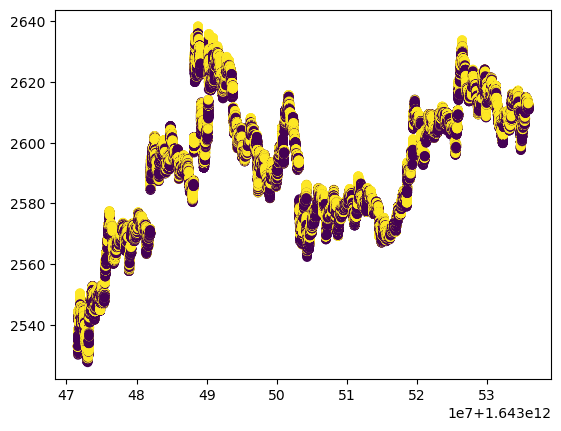

In [3]:
df['Color'] = np.where(df.Side == 'BUY', 1,0)
plt.scatter(x=df.Time,y=df.Price, c=df.Color)

Convert the Time column to DateTime

In [4]:
df.Time = pd.to_datetime(df.Time, unit='ms')
df.Time

0        2022-01-29 15:54:06.747
1        2022-01-29 15:54:05.814
2        2022-01-29 15:54:05.211
3        2022-01-29 15:54:05.119
4        2022-01-29 15:54:04.954
                   ...          
192665   2022-01-30 09:44:05.992
192666   2022-01-30 09:44:05.992
192667   2022-01-30 09:44:05.992
192668   2022-01-30 09:44:05.992
192669   2022-01-30 09:44:05.141
Name: Time, Length: 192670, dtype: datetime64[ns]

Group the values by minute and movement

In [5]:
df.drop(columns='ID', inplace=True)
df

,Time,Price,Side,Quantity,Color
0,2022-01-29 15:54:06.747,2530.36,BUY,0.00001,1
1,2022-01-29 15:54:05.814,2530.01,SELL,0.00149,0
2,2022-01-29 15:54:05.211,2530.43,SELL,0.23713,0
3,2022-01-29 15:54:05.119,2530.55,BUY,4.01105,1
4,2022-01-29 15:54:04.954,2530.49,BUY,0.11855,1
...,...,...,...,...,...
192665,2022-01-30 09:44:05.992,2612.39,SELL,0.07476,0
192666,2022-01-30 09:44:05.992,2612.39,SELL,2.39244,0
192667,2022-01-30 09:44:05.992,2612.39,SELL,0.29905,0
192668,2022-01-30 09:44:05.992,2612.39,SELL,1.19622,0


In [6]:
df = df.set_index('Time')
df

,Price,Side,Quantity,Color
Time,,,,
2022-01-29 15:54:06.747,2530.36,BUY,0.00001,1
2022-01-29 15:54:05.814,2530.01,SELL,0.00149,0
2022-01-29 15:54:05.211,2530.43,SELL,0.23713,0
2022-01-29 15:54:05.119,2530.55,BUY,4.01105,1
2022-01-29 15:54:04.954,2530.49,BUY,0.11855,1
...,...,...,...,...
2022-01-30 09:44:05.992,2612.39,SELL,0.07476,0
2022-01-30 09:44:05.992,2612.39,SELL,2.39244,0
2022-01-30 09:44:05.992,2612.39,SELL,0.29905,0


In [7]:
dg = df.groupby([pd.Grouper(freq = 'min'), 'Side']).mean()
dg

Price  Quantity  Color
Time                Side                              
2022-01-29 15:53:00 BUY   2532.813071  0.349320    1.0
                    SELL  2532.380339  0.956704    0.0
2022-01-29 15:54:00 BUY   2537.183504  0.520643    1.0
                    SELL  2536.234845  0.980688    0.0
2022-01-29 15:55:00 BUY   2543.259250  0.544088    1.0
...                               ...       ...    ...
2022-01-30 09:43:00 SELL  2612.539607  0.225234    0.0
2022-01-30 09:44:00 BUY   2612.381091  0.781104    1.0
                    SELL  2612.111587  0.451136    0.0
2022-01-30 09:45:00 BUY   2611.147857  1.433514    1.0
                    SELL  2611.393125  0.602385    0.0

[2146 rows x 3 columns]

In [8]:
dg = dg.reset_index()
dg

,Time,Side,Price,Quantity,Color
0,2022-01-29 15:53:00,BUY,2532.813071,0.349320,1.0
1,2022-01-29 15:53:00,SELL,2532.380339,0.956704,0.0
2,2022-01-29 15:54:00,BUY,2537.183504,0.520643,1.0
3,2022-01-29 15:54:00,SELL,2536.234845,0.980688,0.0
4,2022-01-29 15:55:00,BUY,2543.259250,0.544088,1.0
...,...,...,...,...,...
2141,2022-01-30 09:43:00,SELL,2612.539607,0.225234,0.0
2142,2022-01-30 09:44:00,BUY,2612.381091,0.781104,1.0
2143,2022-01-30 09:44:00,SELL,2612.111587,0.451136,0.0
2144,2022-01-30 09:45:00,BUY,2611.147857,1.433514,1.0


In [9]:
df['Color'] = np.where(df.Side == 'BUY', 1,0)
df

,Price,Side,Quantity,Color
Time,,,,
2022-01-29 15:54:06.747,2530.36,BUY,0.00001,1
2022-01-29 15:54:05.814,2530.01,SELL,0.00149,0
2022-01-29 15:54:05.211,2530.43,SELL,0.23713,0
2022-01-29 15:54:05.119,2530.55,BUY,4.01105,1
2022-01-29 15:54:04.954,2530.49,BUY,0.11855,1
...,...,...,...,...
2022-01-30 09:44:05.992,2612.39,SELL,0.07476,0
2022-01-30 09:44:05.992,2612.39,SELL,2.39244,0
2022-01-30 09:44:05.992,2612.39,SELL,0.29905,0


In [10]:
dh = dg.loc[(dg.Time > '2022-01-29 16:30') & (dg.Time < '2022-01-29 17:00')]

dh_sell = dh.loc[dh.Side == 'SELL']
dh_buy = dh.loc[dh.Side == 'BUY']

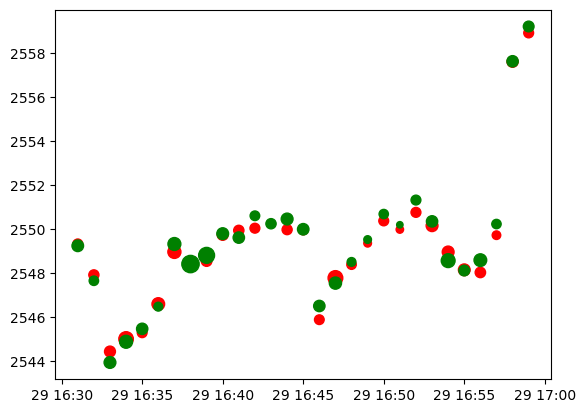

In [11]:
plt.scatter(dh_sell.Time, dh_sell.Price, c='red', s=dh_sell.Quantity*100)
plt.scatter(dh_buy.Time, dh_buy.Price, c='green', s=dh_buy.Quantity*100)

In [12]:
df = df.reset_index()
df = df.loc[(df.Time > '2022-01-29 16:30') & (df.Time < '2022-01-29 17:00')]
df_sell = df.loc[df.Side == 'SELL']
df_buy = df.loc[df.Side == 'BUY']

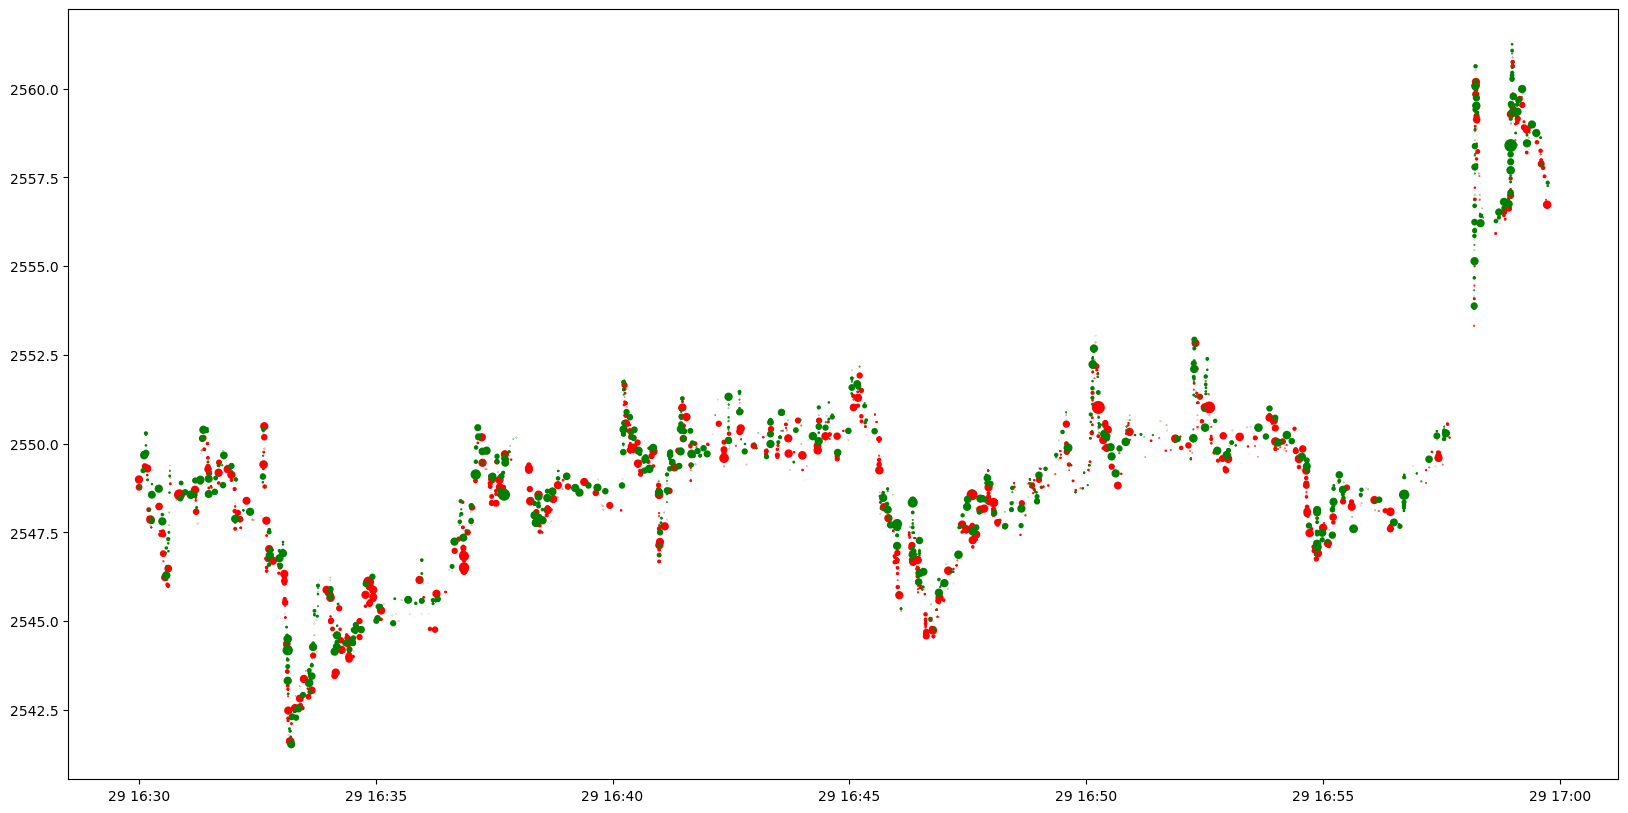

In [24]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(df_sell.Time, df_sell.Price, c='red', s=df_sell.Quantity*5)
ax.scatter(df_buy.Time, df_buy.Price, c='green', s=df_buy.Quantity*5)